In [1]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4 MB 5.0 MB/s 
     |████████████████████████████████| 86 kB 6.4 MB/s 
     |████████████████████████████████| 448 kB 65.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-10-04 07:19:09--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/hate_train_2.csv')

In [4]:
df['comments'] = df['comments'].str.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]','')

In [5]:
train_data, test_data = train_test_split(df, test_size = 0.25, random_state = 42)
print('Train data size :', len(train_data))
print('Test data size :', len(test_data))

Train data size : 10644
Test data size : 3548


In [6]:
df

,comments,hate
0,현재 호텔주인 심정 아 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속 추모받네,1
1,한국적인 미인의 대표적인 분너무나 곱고아름다운모습그모습뒤의 슬픔을 미처 알지못했네요ㅠ,0
2,못된 넘들남의 고통을 즐겼던 넘들이젠 마땅한 처벌을 받아야지그래야 공정한 사회지심은...,1
3,화 어설펐는데 화 지나서부터는 갈수록 너무 재밌던데,0
4,사람 얼굴 손톱으로 긁은것은 인격살해이고 동영상이 몰카냐 메걸리안들 생각이 없노,1
...,...,...
14187,좌우 헬파이어 개씩 개 장착에 아파치보다 약하지만 기관포 장착임,0
14188,세금 내놓으라고 데모질 중 ㅋㅋ간첩 도둑놈 새끼들이 대통령 해처먹으니까 나도 같이...,1
14189,너가 한 말 중에,0
14190,제갈대중 ㅇㅂ,0


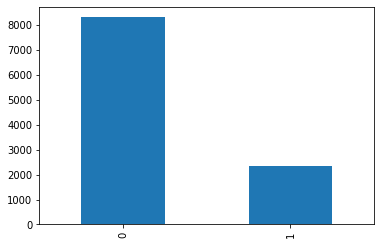

In [7]:
train_data['hate'].value_counts().plot(kind = 'bar')

In [8]:
mecab = Mecab() 

In [9]:
stopwords = ['에게', '를', '의', '로', '으로', '고', '하고', '듯', '인', '하는', '와', '과', '을', '들', '임', '게', '면', '가', '이가',
             '도', '마저', '한', '면', '네', '이', '는', '하', '다', '은', '지', '에', '거', '나', '보', '는데', '아', '나', '만', '에서',
             '음', '니', '냐', '만', ]

In [10]:
train_data['tokenized'] = train_data['comments'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data['tokenized'] = test_data['comments'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [11]:
positive_words = np.hstack(train_data[train_data.hate == 0]['tokenized'].values)
negative_words = np.hstack(train_data[train_data.hate == 1]['tokenized'].values)

In [12]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('있', 976), ('안', 825), ('ㅋㅋㅋ', 745), ('ㅋㅋ', 727), ('없', 708), ('잘', 579), ('좋', 566), ('어', 562), ('겠', 536), ('아니', 536), ('같', 503), ('되', 501), ('사람', 499), ('말', 473), ('했', 442), ('해', 426), ('것', 422), ('여자', 410), ('왜', 405), ('기', 399)]


In [13]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('ㅋㅋㅋ', 590), ('ㅋㅋ', 503), ('있', 292), ('안', 278), ('새끼', 274), ('어', 214), ('없', 208), ('말', 197), ('같', 197), ('일', 185), ('되', 176), ('년', 159), ('해', 159), ('아니', 156), ('야', 151), ('못', 149), ('존나', 145), ('개', 143), ('라', 140), ('노', 140)]


In [14]:
X_train = train_data['tokenized'].values
y_train = train_data['hate'].values
X_test= test_data['tokenized'].values
y_test = test_data['hate'].values

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [16]:
threshold = 2
total_cnt = len(tokenizer.word_index) 
rare_cnt = 0 
total_freq = 0 
rare_freq = 0 

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('Vocabulary Size :',total_cnt)
print('Rare word count less than %s: %s'%(threshold - 1, rare_cnt))
print("Rare vocab ratio in vocab size:", (rare_cnt / total_cnt)*100)
print("Rare vocab ratio in all count:", (rare_freq / total_freq)*100)

Vocabulary Size : 16706
Rare word count less than 1: 8500
Rare vocab ratio in vocab size: 50.87992338082125
Rare vocab ratio in all count: 6.540071402191308


In [17]:
vocab_size = total_cnt - rare_cnt + 2
print('Vocab size :',vocab_size)

Vocab size : 8208


In [18]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [19]:
print(X_train[:5])

[[5, 932, 3456, 186, 17, 8, 326, 33, 155, 1], [415, 18, 246, 253, 23, 1719, 198, 90, 1599, 427, 486, 4228, 5571, 69], [4229, 3457, 1, 591, 86, 52, 232], [933, 128, 338, 1, 1, 2275, 2578], [1496]]


Maxlen : 288
Avglen : 12.210447200300639


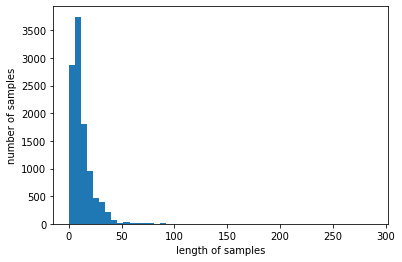

In [20]:
print('Maxlen :',max(len(l) for l in X_train))
print('Avglen :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [23]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('Proportion of samples with a length of %s or less among all samples: %s'%(max_len, (cnt / len(nested_list))*100))

In [24]:
max_len = 60
below_threshold_len(max_len, X_train)

Proportion of samples with a length of 60 or less among all samples: 99.37993235625704


In [25]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [26]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [27]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))

In [28]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [29]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=256, validation_split=0.2)

Epoch 1/15
34/34 [==============================] - 23s 572ms/step - loss: 0.5224 - acc: 0.7627 - val_loss: 0.4838 - val_acc: 0.7825

Epoch 00001: val_acc improved from -inf to 0.78253, saving model to best_model.h5
Epoch 2/15
34/34 [==============================] - 18s 534ms/step - loss: 0.4196 - acc: 0.8134 - val_loss: 0.3914 - val_acc: 0.8271

Epoch 00002: val_acc improved from 0.78253 to 0.82715, saving model to best_model.h5
Epoch 3/15
34/34 [==============================] - 18s 538ms/step - loss: 0.2916 - acc: 0.8826 - val_loss: 0.3791 - val_acc: 0.8450

Epoch 00003: val_acc improved from 0.82715 to 0.84500, saving model to best_model.h5
Epoch 4/15
34/34 [==============================] - 18s 542ms/step - loss: 0.2157 - acc: 0.9158 - val_loss: 0.3531 - val_acc: 0.8464

Epoch 00004: val_acc improved from 0.84500 to 0.84641, saving model to best_model.h5
Epoch 5/15
34/34 [==============================] - 18s 540ms/step - loss: 0.2352 - acc: 0.9154 - val_loss: 0.3787 - val_acc: 0

In [30]:
loaded_model = load_model('best_model.h5')
print("Test Accuracy: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

111/111 [==============================] - 3s 23ms/step - loss: 0.4442 - acc: 0.8523
Test Accuracy: 0.8523


In [74]:
def predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence) 
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = max_len)
  score = float(loaded_model.predict(pad_new))
  if(score > 0.5):
    print("This sentence is an abusive sentence. (Probability: {:.2f}% )".format(score * 100))
  else:
    print("This sentence is an ordinary sentence. (Probability: {:.2f}% )".format((1 - score) * 100))
  

In [76]:
predict('ㅈㄹ하지마세요 제발')

This sentence is an abusive sentence. (Probability: 51.14% )
